Дни с высокой выручкой
                          TOTAL_REV   AVG_DISC
DT_ORD     day_of_week                        
2025-04-09 Wednesday    52481378.22  16.528058
2025-04-25 Friday       51856687.19  16.415991
2025-04-04 Friday       51742758.17  16.465842
2025-04-20 Sunday       51313053.64  16.492355
2025-04-11 Friday       51189889.81  16.477368 

Дни с низкой выручкой
                          TOTAL_REV   AVG_DISC
DT_ORD     day_of_week                        
2025-04-13 Sunday       36392257.34  16.427073
2025-04-12 Saturday     36464468.14  16.451733
2025-04-21 Monday       37211096.57  16.514821
2025-04-28 Monday       37548123.66  16.536289
2025-04-07 Monday       38658763.73  16.474551 

Дни с низкой выручкой
                          TOTAL_REV   AVG_DISC
DT_ORD     day_of_week                        
2025-04-05 Saturday     43706740.96  16.578491 

День недели с самой высокой скидкой
              TOTAL_REV_S  AVG_DISC_S
day_of_week                          
Saturday     1.6

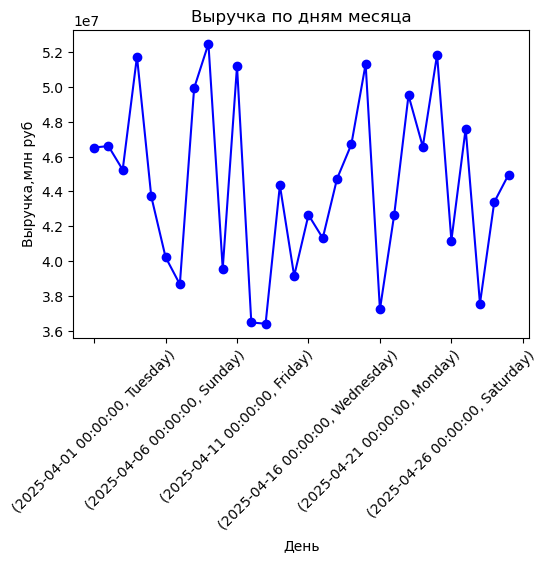

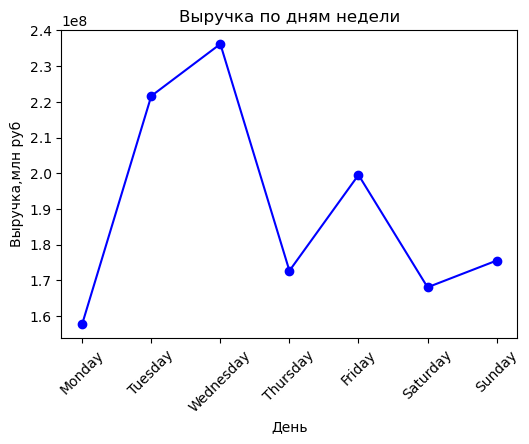

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('data_sales.csv',sep=';')

# Просмотр первых строк данных
df.head()

# Добавим колонку с выручкой
df['revenue'] = df['SALE_SUM'] * df['QUANTITY']

# Добавим колонку с глубиной скидки
df['discount'] = (df['ORIG_SUM'] - df['SALE_SUM'])/df['ORIG_SUM']*100

# Преобразуем дату в формат datetime
df['DT_ORD']  = pd.to_datetime(df['DT_ORD'], format='%d.%m.%Y')

# Выделим день
df['day'] = df['DT_ORD'].dt.day

# Выделим день недели
df['day_of_week'] =  df['DT_ORD'].dt.day_name()

# Группировка по дням
day_revenue = df.groupby(['DT_ORD', 'day_of_week']).agg(
    TOTAL_REV=('revenue', 'sum'),
    AVG_DISC=('discount', 'mean')
)

# Дни с высокой выручкой
day_revenue_starts=day_revenue.sort_values('TOTAL_REV', ascending=False)

day_revenue_top5=day_revenue_starts.head(5)

# Дни с низкой выручкой
day_revenue_end=day_revenue.sort_values('TOTAL_REV', ascending=True)

day_revenue_low5=day_revenue_end.head(5)

# Дни с высокой скидкой
day_disc_starts=day_revenue.sort_values('AVG_DISC', ascending=False).head(1)

# Создаем правильный порядок дней недели
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Преобразуем 'day_of_week' в категориальный тип с заданным порядком
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=weekday_order, ordered=True)

# Группировка по дням недели
d_of_w_revenue = df.groupby('day_of_week', observed=True).agg(
    TOTAL_REV_S=('revenue', 'sum'),
    AVG_DISC_S=('discount', 'mean')
).sort_index()

d_of_w_revenue_starts=d_of_w_revenue.sort_values('TOTAL_REV_S', ascending=False)

d_of_w_discount_1=d_of_w_revenue.sort_values('AVG_DISC_S', ascending=False)


print("Дни с высокой выручкой")
print(day_revenue_starts.head(5), "\n")

print("Дни с низкой выручкой")
print(day_revenue_low5, "\n")


print("День недели с самой высокой скидкой")
print(d_of_w_discount_1, "\n")

print("День с самой высокой скидкой")
print(day_disc_starts.head(1), "\n")

print(df.head())

# Визуализация
plt.figure(figsize=(20, 4))
plt.subplot(1, 3, 1)
day_revenue['TOTAL_REV'].plot(kind='line', color='blue',marker='o', label='Продажи')
plt.title('Выручка по дням месяца')
plt.xlabel('День')
plt.ylabel('Выручка,млн руб')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20, 4))
plt.subplot(1, 3, 2)
d_of_w_revenue['TOTAL_REV_S'].plot(kind='line', color='blue',marker='o', label='Продажи')
plt.title('Выручка по дням недели')
plt.xlabel('День')
plt.ylabel('Выручка,млн руб')
plt.xticks(rotation=45)
plt.show()
